In [3]:
import pandas as pd
import numpy as np
import requests

In [34]:
dnew=pd.read_csv('../raw_data/london_re_postcodes_latlon_cleaned.zip',compression='zip',
                dtype={'price': np.int64,'month':np.int8,'year':np.int16} 
                )

In [22]:
dnew.head()

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
0,420000,14-09-08 00:00,BR4 0BP,T,N,F,2014.0,9.0,51.383354,-0.000374
1,500000,14-10-27 00:00,SE16 7RL,T,N,F,2014.0,10.0,51.493026,-0.041706
2,520500,04-12-10 00:00,W5 5HX,T,N,F,2004.0,12.0,51.507016,-0.306697
3,762500,14-06-12 00:00,N19 3HZ,T,N,F,2014.0,6.0,51.564937,-0.128594
4,1150000,11-08-18 00:00,N1 0JA,T,N,F,2011.0,8.0,51.535515,-0.108532


In [63]:
batch1=pd.read_csv('../raw_data/london_re_postcodes_latlon_batch_1.zip',compression='zip',
               dtype={'price': np.int64,'month':np.int8,'year':np.int16} )


In [17]:
batch1.head(20)

,price,date,postcode,property_type,property_age,ownership,number,additional_info,street,locality,town,borough,county,year,month,day,full_property_number,lat_lon,lat,lon
0,790000,20-09-30 00:00,SW20 9HF,S,N,F,26,NaN,PARKWAY,NaN,LONDON,MERTON,GREATER LONDON,2020,9,30,26,"(51.40028, -0.224964)",51.400280,-0.224964
1,585000,20-11-13 00:00,BR3 4NX,T,N,F,11,NaN,ARROL ROAD,NaN,BECKENHAM,BROMLEY,GREATER LONDON,2020,11,13,11,"(51.403871, -0.052993)",51.403871,-0.052993
2,395000,20-10-23 00:00,DA16 1NE,S,N,F,177,NaN,NORTHDOWN ROAD,NaN,WELLING,BEXLEY,GREATER LONDON,2020,10,23,177,"(51.464676, 0.121365)",51.464676,0.121365
3,355000,20-10-23 00:00,DA16 1QU,T,N,F,5,NaN,BERWICK ROAD,NaN,WELLING,BEXLEY,GREATER LONDON,2020,10,23,5,"(51.469721, 0.111923)",51.469721,0.111923
4,1187500,20-11-02 00:00,SE19 2RE,D,N,F,2,NaN,LIMEKILN PLACE,NaN,LONDON,CROYDON,GREATER LONDON,2020,11,2,2,"(51.413832, -0.078427)",51.413832,-0.078427
5,720000,20-10-30 00:00,DA15 9EA,S,N,F,13,NaN,CAVENDISH AVENUE,NaN,SIDCUP,BEXLEY,GREATER LONDON,2020,10,30,13,"(51.444012, 0.104808)",51.444012,0.104808
6,411750,20-08-14 00:00,BR3 4NG,T,N,L,149,NaN,BLANDFORD ROAD,NaN,BECKENHAM,BROMLEY,GREATER LONDON,2020,8,14,149,"(51.407227, -0.047157)",51.407227,-0.047157
7,513000,20-10-21 00:00,KT5 9LQ,T,N,F,42,NaN,WARREN DRIVE NORTH,NaN,SURBITON,KINGSTON UPON THAMES,GREATER LONDON,2020,10,21,42,"(51.382514, -0.279436)",51.382514,-0.279436
8,395000,20-11-02 00:00,SM5 2AU,F,N,L,"WESTCROFT COURT, 59",FLAT 5,WESTCROFT ROAD,NaN,CARSHALTON,SUTTON,GREATER LONDON,2020,11,2,"WESTCROFT COURT, 59 FLAT 5","(51.366336, -0.158756)",51.366336,-0.158756
9,569950,20-10-15 00:00,BR4 0DH,T,N,F,43,NaN,LANGLEY WAY,NaN,WEST WICKHAM,BROMLEY,GREATER LONDON,2020,10,15,43,"(51.380014, -0.006483)",51.380014,-0.006483


In [64]:
batch1.drop(labels=['number', 'additional_info','street', 'locality', 'borough','town','county','day','full_property_number'], 
            axis='columns',
           inplace=True)

In [37]:
merged=pd.concat([batch1, dnew], axis=0, ignore_index=True)

In [38]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343094 entries, 0 to 343093
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          343094 non-null  int64  
 1   date           343094 non-null  object 
 2   postcode       343094 non-null  object 
 3   property_type  343094 non-null  object 
 4   property_age   343094 non-null  object 
 5   ownership      343094 non-null  object 
 6   year           343094 non-null  int16  
 7   month          343094 non-null  int8   
 8   lat            343094 non-null  float64
 9   lon            343094 non-null  float64
dtypes: float64(2), int16(1), int64(1), int8(1), object(5)
memory usage: 21.9+ MB


In [49]:
merged.sort_values(['year','month'],inplace=True)

In [53]:
merged_clean=merged.drop_duplicates()
# difference shows about 

In [54]:
len(merged)-len(merged_clean)

11480

In [57]:
# save to csv
merged_clean.to_csv('../raw_data/london_re_postcodes_latlon_merged_cleaned_v1.zip',
                    compression='zip',
                   index=False)

## Create dictionary of postcode - latlon value based on api extracted data

In [58]:
len(merged_clean)

331614

In [60]:
merged_clean.postcode.nunique()

98621

In [65]:
# compare the above number to overall number of unique postcodes -> it's about 131k? 
# extract per postcode the lat and lon value (do it from unmerged?)
batch1.postcode.nunique()
# or create new str column from lat lon, only keep nunique and latlon line

90517

In [70]:
merged_clean['latlon']=merged_clean.apply(lambda x: list([x['lat'],x['lon']]),
                                          axis=1)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/3169057694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['latlon']=merged_clean.apply(lambda x: list([x['lat'],x['lon']]),


In [96]:
tmp=merged_clean[['postcode','latlon']]
print(tmp['postcode'].nunique())

98621


In [106]:
# selecting only the unique postcodes
tmp.drop_duplicates(subset=['postcode'],inplace=True)
tmp.set_index(['postcode'],inplace=True)

/var/folders/63/8j1yfj216fzgvry8md3j8x400000gn/T/ipykernel_4240/1833647678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.drop_duplicates(subset=['postcode'],inplace=True)


In [107]:
tmp

,latlon
postcode,
SW7 5QT,"[51.494562, -0.179464]"
SW7 1NL,"[51.499898, -0.17042]"
SE21 8AT,"[51.434224, -0.08642]"
N2 0DT,"[51.586956, -0.181013]"
IG8 0NF,"[51.613171, 0.026884]"
...,...
SE15 3SY,"[51.468168, -0.064324]"
TW1 2NG,"[51.450334, -0.317732]"
E2 8PJ,"[51.533449, -0.071072]"


In [134]:
latlondict=tmp.to_dict(orient='index')
latlondict

{'SW7 5QT': {'latlon': [51.494562, -0.179464]},
 'SW7 1NL': {'latlon': [51.499898, -0.17042]},
 'SE21 8AT': {'latlon': [51.434224, -0.08642]},
 'N2 0DT': {'latlon': [51.586956, -0.181013]},
 'IG8 0NF': {'latlon': [51.613171, 0.026884]},
 'UB3 2NQ': {'latlon': [51.51606, -0.420653]},
 'TW10 6PL': {'latlon': [51.457482, -0.297721]},
 'EN4 0HU': {'latlon': [51.670459, -0.168342]},
 'NW11 6YD': {'latlon': [51.585762, -0.196838]},
 'NW3 7DJ': {'latlon': [51.554584, -0.186665]},
 'W13 8AJ': {'latlon': [51.521163, -0.321206]},
 'SW10 9UR': {'latlon': [51.481559, -0.188162]},
 'SW5 9NN': {'latlon': [51.492404, -0.196376]},
 'SW11 6AF': {'latlon': [51.454557, -0.155479]},
 'SW7 3LR': {'latlon': [51.492982, -0.173866]},
 'W11 2HR': {'latlon': [51.512788, -0.210905]},
 'SW19 6NY': {'latlon': [51.442869, -0.207235]},
 'SW6 7BN': {'latlon': [51.479835, -0.206506]},
 'WC1B 3AG': {'latlon': [51.517761, -0.129634]},
 'W2 2HL': {'latlon': [51.513974, -0.164264]},
 'N21 1AP': {'latlon': [51.638515, -0.1

In [112]:
#accessing the dictionary
key='SW7 5QT'
lat=latlondict[key]['latlon'][0]
lon=latlondict[key]['latlon'][1]

## populating lat lon values in df sample by calling postcode dict 

In [130]:
%cd ..

/Users/Marie/code/MarieMCodes/re_value_predictor


/Users/Marie/.pyenv/versions/3.10.6/envs/re_value_predictor/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [131]:
!pwd


/Users/Marie/code/MarieMCodes/re_value_predictor


In [141]:
from project_code.data import load_csv, tidy_df, shorten_df
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
data=load_csv()
df=tidy_df(data)
df=shorten_df(df)
df.head()

,price,date,postcode,property_type,property_age,ownership,year,month
3,405000,95-04-07 00:00,N1 2JU,S,N,F,1995,4
120,620000,95-09-01 00:00,SW15 2NU,T,N,F,1995,9
132,200500,95-11-20 00:00,SE23 2QA,D,N,F,1995,11
138,270000,95-09-01 00:00,SW5 0DU,F,N,L,1995,9
251,210000,95-05-19 00:00,SW19 7HD,T,N,F,1995,5


In [144]:
len(df)

2172318

In [145]:
sample=df.sample(1000,random_state=42)

In [155]:
# Build function to look up key or will with Error
def dict_lat_lookup(postcode):
    """ 
    takes a postcode and looks up lat value based on dictionary
    """
    try:
        lat=latlondict[postcode]['latlon'][0]
        return lat
    except:
        return None

def dict_lon_lookup(postcode):
    """ 
    takes a postcode and looks up lon value based on dictionary
    """
    try:
        lon=latlondict[postcode]['latlon'][1]
        return lon
    except:
        return None


In [156]:
sample['lat']=sample['postcode'].apply(lambda x: dict_lat_lookup(x))


In [161]:
# extract all the missing postcodes - no latlon yet
df_api=sample[sample['lat'].isna()==True]
df_api
# create new df for postcodes with no latlon and only keep unique postcodes.
# Run api on those, can use new dict later to prepoluate rest of df


,price,date,postcode,property_type,property_age,ownership,year,month,lat
2922072,2950000,16-12-22 00:00,SW7 1JH,F,N,L,2016,12,NaN
2219682,365000,10-01-08 00:00,IG4 5AE,T,N,F,2010,1,NaN
2080140,315000,08-02-08 00:00,SE19 1XQ,F,N,L,2008,2,NaN
1142629,320000,02-08-23 00:00,TW1 1RP,T,N,F,2002,8,NaN
1883984,245000,07-12-20 00:00,KT2 6QR,F,Y,L,2007,12,NaN
2554247,290000,13-11-01 00:00,RM14 2SQ,F,N,L,2013,11,NaN
192228,363000,96-09-05 00:00,SW3 5NP,F,N,L,1996,9,NaN
2472393,418000,13-06-05 00:00,NW1 2NN,F,N,L,2013,6,NaN
1648331,419998,05-04-07 00:00,EC2A 4XF,F,N,L,2005,4,NaN


In [162]:
df_api['postcode'].nunique()

9

## Fill whole cleaned df with lat lon values

In [163]:
df['lat']=df['postcode'].apply(lambda x: dict_lat_lookup(x))
df['lon']=df['postcode'].apply(lambda x: dict_lon_lookup(x))

In [164]:
df.head()

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
3,405000,95-04-07 00:00,N1 2JU,S,N,F,1995,4,51.546844,-0.093986
120,620000,95-09-01 00:00,SW15 2NU,T,N,F,1995,9,51.463859,-0.208462
132,200500,95-11-20 00:00,SE23 2QA,D,N,F,1995,11,51.439611,-0.047733
138,270000,95-09-01 00:00,SW5 0DU,F,N,L,1995,9,51.488952,-0.189410
251,210000,95-05-19 00:00,SW19 7HD,T,N,F,1995,5,51.425590,-0.208721


In [180]:
# extract dataset without postcodes = 173thousand rows
df_for_api=df[df['lat'].isna()==True]
# write this dataset to csv
df_for_api.to_csv('raw_data/london_re_needs_latlon.zip' ,index=False, compression='zip')

In [178]:
# save dataset without Nan postcodes - ready for training -- approx. 2ml rows
df=df[df['lat'].isna()==False]
# save to csv
df.to_csv('raw_data/london_re_postcodes_latlon_cleaned_v2.zip' ,index=False, compression='zip')

In [179]:
len(df)

1998437

In [177]:
# duplication identification doesn't work with strings. better once all are hot encoded. but there shouldnt be duplicates in the data anyway.
df[df.duplicated(subset=['price', 'postcode', 'property_type', 'property_age', 'ownership', 'year', 'month'], keep=False)]

,price,date,postcode,property_type,property_age,ownership,year,month,lat,lon
858,295000,95-12-01 00:00,SW1V 3QP,F,N,L,1995,12,51.486377,-0.133598
1690,249950,95-12-05 00:00,SW13 9EY,T,Y,F,1995,12,51.484916,-0.234925
2146,400000,95-03-03 00:00,W1J 8EA,F,Y,L,1995,3,51.508665,-0.143524
2424,830000,95-01-02 00:00,EC4A 1JQ,F,N,F,1995,1,51.517281,-0.110340
2860,200000,95-06-12 00:00,SW3 3HN,F,N,L,1995,6,51.491539,-0.165511
...,...,...,...,...,...,...,...,...,...,...
3621789,750000,23-01-23 00:00,SW8 2FY,F,N,L,2023,1,51.481772,-0.127251
3621790,750000,23-01-23 00:00,SW8 2FY,F,N,L,2023,1,51.481772,-0.127251
3622599,380000,23-01-16 00:00,RM12 5EH,T,N,F,2023,1,51.546144,0.191210
3622751,380000,23-01-27 00:00,RM12 5EH,T,N,F,2023,1,51.546144,0.191210


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998437 entries, 3 to 3623318
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int32  
 1   date           object 
 2   postcode       object 
 3   property_type  object 
 4   property_age   object 
 5   ownership      object 
 6   year           int16  
 7   month          int16  
 8   lat            float64
 9   lon            float64
dtypes: float64(2), int16(2), int32(1), object(5)
memory usage: 137.2+ MB


In [115]:
# !! as a next step, from big df, extract the values where we don't have lat lon and run api on those, with unique postcodes only.

## Convert month to cyclical feature

In [181]:
import matplotlib.pyplot as plt

# transforming month column MM
months_in_year=12
df['sin_time'] = np.sin(2*np.pi*df.month/months_in_year)
df['cos_time'] = np.cos(2*np.pi*df.month/months_in_year)
#df.drop('month', axis=1, inplace=True)  keep the month axis

In [183]:
df.drop(columns=['postcode'],inplace=True)

In [184]:
df.to_csv('raw_data/london_re_postcodes_latlon_master.zip' ,index=False, compression='zip')

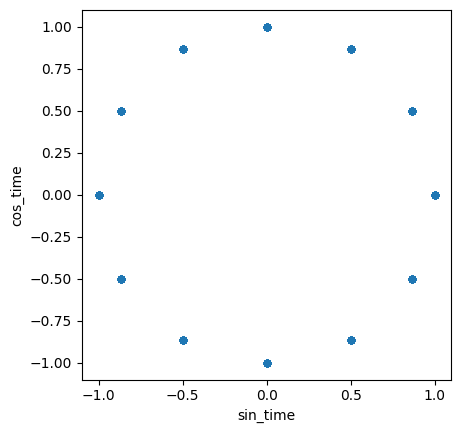

In [186]:
df.plot.scatter('sin_time','cos_time').set_aspect('equal')

In [185]:
df.columns

Index(['price', 'date', 'property_type', 'property_age', 'ownership', 'year',
       'month', 'lat', 'lon', 'sin_time', 'cos_time'],
      dtype='object')